In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [2]:
import requests
import gzip
import shutil

## Download informations about paris adresses
# url = "https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-75.csv.gz"
# destination_path = "data/paris_adress_info.csv"
# response = requests.get(url, stream=True)
# response.raise_for_status()
#
# with gzip.open(response.raw, 'rb') as f_in, open(destination_path, 'wb') as f_out:
#     shutil.copyfileobj(f_in, f_out)

In [3]:
## utf-8 encoding does not replace curly apostrophe with normal ones
# df = pd.read_csv('data/uber.csv', encoding='utf-8')
# print(df[df['raw_start_location'].str.contains('Rue de l’Ouest', case=False)])
# print(df.loc[df['raw_start_location'] == '65, Rue de l’Ouest'])
# print(paris_adress_info.loc[(paris_adress_info['numero'] == 65) & (paris_adress_info['nom_voie'] == 'Rue de l\'Ouest')])

In [4]:
uber_data = pd.read_csv("data/uber.csv")

uber_data.columns
uber_data.shape
uber_data.dtypes
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           10000 non-null  object 
 1   raw_start_location  10000 non-null  object 
 2   raw_end_location    10000 non-null  object 
 3   fee                 10000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [5]:
uber_data.head()

,timestamp,raw_start_location,raw_end_location,fee
0,2023-01-18 22:21:35,"145, Rue Belliard, Paris 18e Arrondissement","315, Rue de Charenton, Paris 12e Arrondissement",16.57
1,2023-01-19 20:31:27,"127, Rue de Charenton, Paris 12e Arrondissement","1, Square de la Dordogne, Paris 17e Arrondisse...",18.61
2,2023-01-25 19:40:10,"8, Rue Richard Lenoir, Paris 11e Arrondissement","9, Rue de Cherbourg, Paris 15e Arrondissement",13.15
3,2023-01-14 10:07:15,"6, Rue Guisarde, Paris 6e Arrondissement","28, Rue Guynemer, Paris 6e Arrondissement",5.00
4,2023-01-01 21:23:11,"2, Rue Cognacq-Jay, Paris 7e Arrondissement","115, Boulevard du Montparnasse, Paris 6e Arron...",5.00


In [6]:
uber_data.tail()

,timestamp,raw_start_location,raw_end_location,fee
9995,2023-01-14 20:46:20,"31, Rue du Transvaal, Paris 20e Arrondissement","122, Avenue Emile Zola, Paris 15e Arrondissement",8.48
9996,2023-01-08 10:39:42,"2, Passage Vérité, Paris 1er Arrondissement","94, Rue Raynouard, Paris 16e Arrondissement",8.28
9997,2023-01-03 15:44:24,"30, Rue des Grands Moulins, Paris 13e Arrondis...","40, Avenue de Villiers, Paris 17e Arrondissement",5.00
9998,2023-01-09 19:44:26,"43, Avenue Hoche, Paris 8e Arrondissement","44, Rue Bargue, Paris 15e Arrondissement",5.00
9999,2023-01-11 19:46:49,"182, Avenue de Versailles, Paris 16e Arrondiss...","6, Rue George Balanchine, Paris 13e Arrondisse...",36.15


In [7]:
uber_data.describe()

,fee
count,10000.000000
mean,10.411971
std,8.693616
min,5.000000
25%,5.000000
50%,6.640000
75%,12.640000
max,100.760000


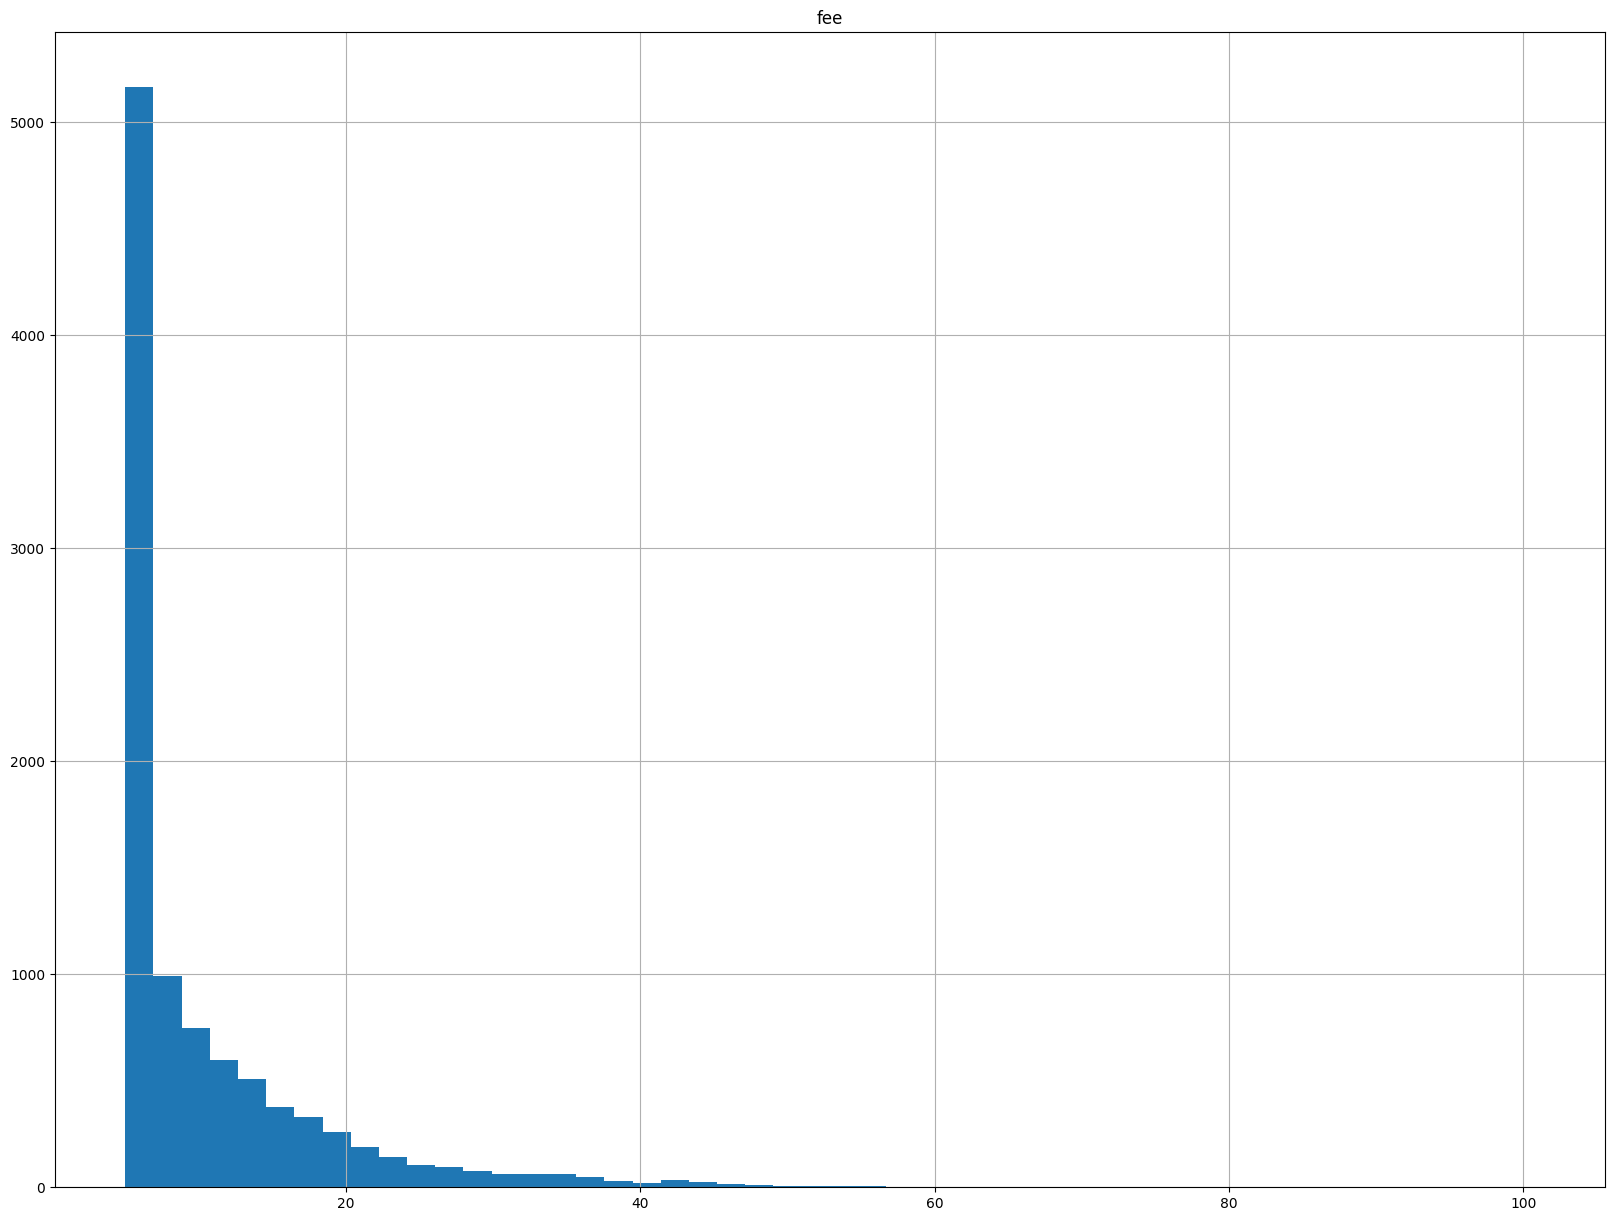

In [8]:
uber_data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
meteo = pd.read_csv("data/meteo_france.csv")
meteo.columns
meteo.shape
meteo.dtypes
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    744 non-null    object
 1   rain_level   744 non-null    int64 
 2   temperature  744 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.6+ KB


In [10]:
meteo.head()

,timestamp,rain_level,temperature
0,2023-01-01 00:00:00,0,4
1,2023-01-01 01:00:00,0,4
2,2023-01-01 02:00:00,0,4
3,2023-01-01 03:00:00,0,4
4,2023-01-01 04:00:00,0,4


In [11]:
meteo.tail()

,timestamp,rain_level,temperature
739,2023-01-31 19:00:00,0,9
740,2023-01-31 20:00:00,0,9
741,2023-01-31 21:00:00,0,9
742,2023-01-31 22:00:00,0,9
743,2023-01-31 23:00:00,0,9


In [12]:
meteo.describe()

,rain_level,temperature
count,744.000000,744.000000
mean,0.357527,6.692204
std,0.745464,3.468085
min,0.000000,-3.000000
25%,0.000000,5.000000
50%,0.000000,7.000000
75%,0.000000,9.000000
max,3.000000,14.000000


In [13]:
paris_adress_info = pd.read_csv("data/paris_adress_info.csv", delimiter=';')
paris_adress_info.columns
paris_adress_info.shape
paris_adress_info.dtypes
paris_adress_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158048 entries, 0 to 158047
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           158048 non-null  object 
 1   id_fantoir                   154684 non-null  object 
 2   numero                       158048 non-null  int64  
 3   rep                          18225 non-null   object 
 4   nom_voie                     158048 non-null  object 
 5   code_postal                  158048 non-null  int64  
 6   code_insee                   158048 non-null  int64  
 7   nom_commune                  158048 non-null  object 
 8   code_insee_ancienne_commune  0 non-null       float64
 9   nom_ancienne_commune         0 non-null       float64
 10  x                            158048 non-null  float64
 11  y                            158048 non-null  float64
 12  lon                          158048 non-null  float64
 13 

In [14]:
paris_adress_info.head()

,id,id_fantoir,numero,rep,nom_voie,code_postal,code_insee,nom_commune,code_insee_ancienne_commune,nom_ancienne_commune,...,lat,type_position,alias,nom_ld,libelle_acheminement,nom_afnor,source_position,source_nom_voie,certification_commune,cad_parcelles
0,75101_cfq3tf_00001,NaN,1,NaN,Avenue du Général Lemonnier,75001,75101,Paris 1er Arrondissement,NaN,NaN,...,48.861299,parcelle,NaN,NaN,PARIS,AVENUE DU GENERAL LEMONNIER,commune,commune,1,NaN
1,75101_cfq3tf_00002,NaN,2,NaN,Avenue du Général Lemonnier,75001,75101,Paris 1er Arrondissement,NaN,NaN,...,48.861059,parcelle,NaN,NaN,PARIS,AVENUE DU GENERAL LEMONNIER,commune,commune,1,NaN
2,75101_cfq3tf_00003,NaN,3,NaN,Avenue du Général Lemonnier,75001,75101,Paris 1er Arrondissement,NaN,NaN,...,48.861516,parcelle,NaN,NaN,PARIS,AVENUE DU GENERAL LEMONNIER,commune,commune,1,NaN
3,75101_cfq3tf_00004,NaN,4,NaN,Avenue du Général Lemonnier,75001,75101,Paris 1er Arrondissement,NaN,NaN,...,48.861247,parcelle,NaN,NaN,PARIS,AVENUE DU GENERAL LEMONNIER,commune,commune,1,NaN
4,75101_cfq3tf_00005,NaN,5,NaN,Avenue du Général Lemonnier,75001,75101,Paris 1er Arrondissement,NaN,NaN,...,48.861733,parcelle,NaN,NaN,PARIS,AVENUE DU GENERAL LEMONNIER,commune,commune,1,NaN


In [15]:
paris_adress_info.tail()

,id,id_fantoir,numero,rep,nom_voie,code_postal,code_insee,nom_commune,code_insee_ancienne_commune,nom_ancienne_commune,...,lat,type_position,alias,nom_ld,libelle_acheminement,nom_afnor,source_position,source_nom_voie,certification_commune,cad_parcelles
158043,75108_4506_00015,75108_4506,15,NaN,Place du Havre,75008,75108,Paris 8e Arrondissement,NaN,NaN,...,48.875317,parcelle,NaN,NaN,PARIS,PLACE DU HAVRE,commune,commune,1,NaN
158044,75108_4506_00017,75108_4506,17,NaN,Place du Havre,75008,75108,Paris 8e Arrondissement,NaN,NaN,...,48.875369,parcelle,NaN,NaN,PARIS,PLACE DU HAVRE,commune,commune,1,NaN
158045,75108_0218_00002_v,75108_0218,2,v,Pont de l'Alma,75008,75108,Paris 8e Arrondissement,NaN,NaN,...,48.864042,parcelle,NaN,NaN,PARIS,PONT DE L ALMA,commune,commune,1,NaN
158046,75108_6179_00001_v,75108_6179,1,v,Place Maurice Couve de Murville,75008,75108,Paris 8e Arrondissement,NaN,NaN,...,48.874855,parcelle,NaN,NaN,PARIS,PLACE MAURICE COUVE DE MURVILLE,commune,commune,1,NaN
158047,75108_4729_00003,75108_4729,3,NaN,Pont des Invalides,75008,75108,Paris 8e Arrondissement,NaN,NaN,...,48.864259,parcelle,NaN,NaN,PARIS,PONT DES INVALIDES,commune,commune,1,NaN


In [16]:
paris_adress_info.describe()

,numero,code_postal,code_insee,code_insee_ancienne_commune,nom_ancienne_commune,x,y,lon,lat,alias,nom_ld,certification_commune,cad_parcelles
count,158048.000000,158048.000000,158048.000000,0.0,0.0,158048.000000,1.580480e+05,158048.000000,158048.000000,0.0,0.0,158048.0,0.0
mean,39.247140,75013.417512,75113.097356,NaN,NaN,651773.430232,6.862393e+06,2.342680,48.859763,NaN,NaN,1.0,NaN
std,49.889947,7.739461,5.111492,NaN,NaN,2878.838026,2.314942e+03,0.039224,0.020829,NaN,NaN,0.0,NaN
min,0.000000,75001.000000,75101.000000,NaN,NaN,643185.930000,6.857492e+06,2.225726,48.815692,NaN,NaN,1.0,NaN
25%,8.000000,75010.000000,75110.000000,NaN,NaN,649653.950000,6.860504e+06,2.313789,48.842699,NaN,NaN,1.0,NaN
50%,20.000000,75014.000000,75114.000000,NaN,NaN,651917.060000,6.862356e+06,2.344656,48.859436,NaN,NaN,1.0,NaN
75%,51.000000,75017.000000,75117.000000,NaN,NaN,654068.695000,6.864268e+06,2.373939,48.876686,NaN,NaN,1.0,NaN
max,422.000000,75116.000000,75120.000000,NaN,NaN,661059.890000,6.867076e+06,2.469490,48.902106,NaN,NaN,1.0,NaN


In [17]:
paris_adress_info.isnull().sum()

id                                  0
id_fantoir                       3364
numero                              0
rep                            139823
nom_voie                            0
code_postal                         0
code_insee                          0
nom_commune                         0
code_insee_ancienne_commune    158048
nom_ancienne_commune           158048
x                                   0
y                                   0
lon                                 0
lat                                 0
type_position                       0
alias                          158048
nom_ld                         158048
libelle_acheminement                0
nom_afnor                           0
source_position                     0
source_nom_voie                     0
certification_commune               0
cad_parcelles                  158048
dtype: int64

## Some observations on our datasets
- We do not have the end-of-ride timestamp. So we can't calculate the duration of the race.
- Another important feature is the real distance: we need to use an algorithm based on a map of Paris that calculates the real distance between 2 
addresses. We would need to call the API of a software that can gives us this information.
- We also do not have information on the distance from the vehicle to the point of departure, which may have an impact on the price.
- We do not have the number of requests sent by date/time/desired start location/desired end location. Nor the number of drivers available (the offer) by date/time/location. The demand/supply ratio is very often a good pricing metric for a service.

In [18]:
# Feature Engineering
# Let's create new features
## Different options to formate the timestamp

# uber_data['timestamp'] =  pd.to_datetime(uber_data['timestamp'], format='%Y-%m-%d %H:%M:%S')  # %Y-%m-%d %H:%M:%S UTC
# uber_data['Year'] = uber_data['timestamp'].dt.year
# uber_data['Month'] = uber_data['timestamp'].dt.month
# uber_data['Date'] = uber_data['timestamp'].dt.day
# uber_data['Day'] = uber_data['timestamp'].dt.dayofweek
# uber_data['Hour'] = uber_data['timestamp'].dt.hour
# uber_data['Minute'] = uber_data['timestamp'].dt.minute
## Everything is string now. You should convert to .astype('int64') or smth
# uber_data.head()

# uber_data.pickup_datetime=pd.to_datetime(uber_data.pickup_datetime)
# uber_data['year'] = uber_data.pickup_datetime.dt.year
# uber_data['month'] = uber_data.pickup_datetime.dt.month
# uber_data['weekday'] = uber_data.pickup_datetime.dt.weekday
# uber_data['hour'] = uber_data.pickup_datetime.dt.hour

# import calendar
# Train_Data['day']=Train_Data['pickup_datetime'].apply(lambda x:x.day)
# Train_Data['hour']=Train_Data['pickup_datetime'].apply(lambda x:x.hour)
# Train_Data['month']=Train_Data['pickup_datetime'].apply(lambda x:x.month)
# Train_Data['year']=Train_Data['pickup_datetime'].apply(lambda x:x.year)
# Train_Data['weekday']=Train_Data['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
# Train_Data.weekday = Train_Data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
# Train_Data.drop(labels = 'pickup_datetime',axis=1,inplace=True)

In [19]:
uber_data = uber_data.dropna()
uber_data["datetime"] = pd.to_datetime(uber_data["timestamp"])
uber_data['day'] = pd.to_datetime(uber_data['datetime']).dt.day
# Hours are rounded and if hour should be equal to 24 it will be replaced by 0
uber_data['hour'] = (uber_data['timestamp'].str.split().str[1].str.split(':').apply(lambda x: int(x[0]) + (int(x[1]) >= 30)) % 24)

import calendar
uber_data['weekday'] = uber_data['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

uber_data.head()
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           10000 non-null  object        
 1   raw_start_location  10000 non-null  object        
 2   raw_end_location    10000 non-null  object        
 3   fee                 10000 non-null  float64       
 4   datetime            10000 non-null  datetime64[ns]
 5   day                 10000 non-null  int32         
 6   hour                10000 non-null  int64         
 7   weekday             10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 586.1+ KB


In [20]:
# Remove outliers, check for negative values, missing values, NaN, inf etc

# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# checks for NaN values in each column and sums the number of occurrences
print(uber_data.isnull().sum())
# filters the DataFrame to include only rows where at least one value is NaN.
rows_with_nan = uber_data[uber_data.isnull().any(axis=1)]
print(rows_with_nan)

q = uber_data["fee"].quantile(0.99)
print(q)
uber_data = uber_data[uber_data["fee"] < q]
print(uber_data.describe())
uber_data.info()

timestamp             0
raw_start_location    0
raw_end_location      0
fee                   0
datetime              0
day                   0
hour                  0
weekday               0
dtype: int64
Empty DataFrame
Columns: [timestamp, raw_start_location, raw_end_location, fee, datetime, day, hour, weekday]
Index: []
43.55080000000002
               fee                       datetime          day         hour
count  9900.000000                           9900  9900.000000  9900.000000
mean      9.949539  2023-01-16 17:46:44.494848512    16.178687    13.027677
min       5.000000            2023-01-01 00:01:16     1.000000     0.000000
25%       5.000000     2023-01-08 21:51:00.500000     8.000000     9.000000
50%       6.580000            2023-01-16 19:12:19    16.000000    13.000000
75%      12.410000            2023-01-24 13:54:35    24.000000    18.000000
max      43.550000            2023-01-31 23:55:50    31.000000    23.000000
std       7.248961                            NaN

'\nData looks highly skewed. The non-linear targets seems to follow a negative exponential distribution. \nA good idea is to apply a logarithmic transformation to to linearize the targets (for a linear estimator) and make the probability density functions \nmore gaussian.\n'

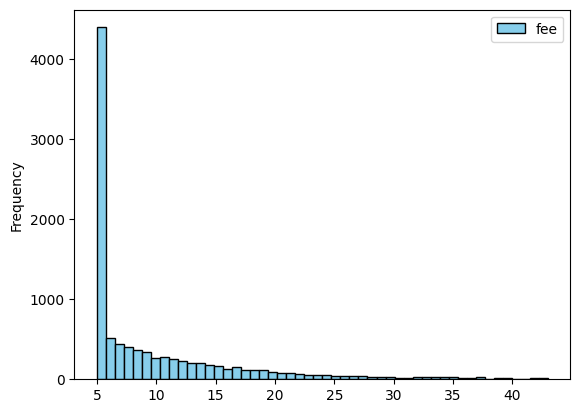

In [21]:
# Quantity of hire per fee
uber_data.plot(kind = "hist",y = "fee", bins= 50, range = (uber_data['fee'].astype(int).min(), uber_data['fee'].astype(int).max()), color='skyblue', edgecolor='black')
"""
Data looks highly skewed. The non-linear targets seems to follow a negative exponential distribution. 
A good idea is to apply a logarithmic transformation to to linearize the targets (for a linear estimator) and make the probability density functions 
more gaussian.
"""

<Axes: title={'center': 'fee'}, xlabel='day'>

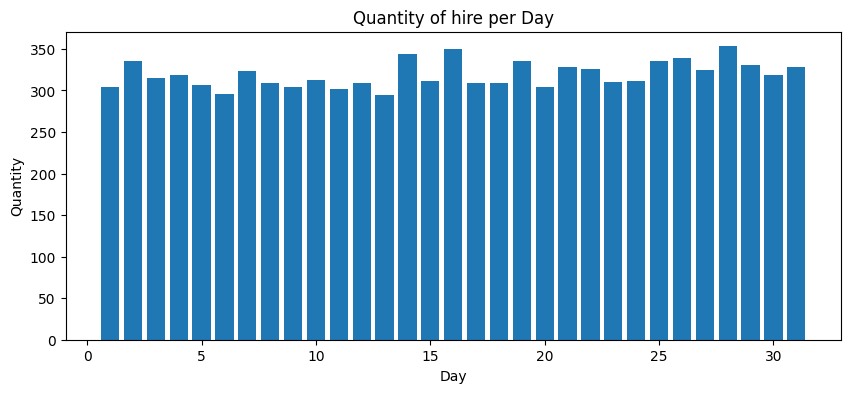

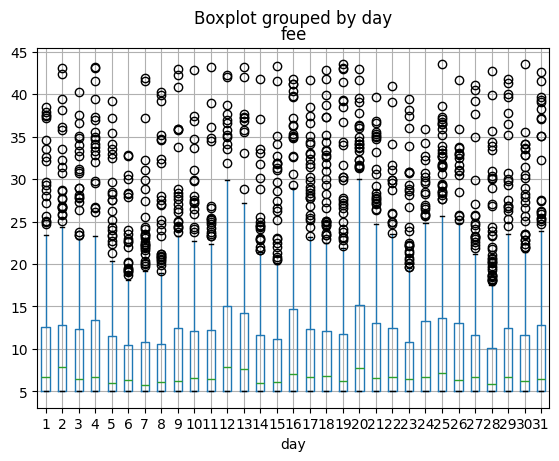

In [22]:
# fig, ax = plt.subplots(1,2)
# ax[0].hist(list1, bins, alpha = 0.5, color = 'r')
# ax[1].hist(list2, bins, alpha = 0.5, color = 'g')
# plt.show()

hire_per_day = uber_data['day'].value_counts().sort_index()
# hire_per_day.plot.bar(x=hire_per_day, y='day', rot=0)
plt.figure(figsize=(10, 4))
plt.bar(hire_per_day.index, hire_per_day.values)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Quantity of hire per Day')
# plt.show()

# 01/01/2023 is a Sunday. Is fee higher during some part of the week ? like the week-end ?
uber_data.boxplot(column = "fee",by = "day")

<Axes: title={'center': 'fee'}, xlabel='hour'>

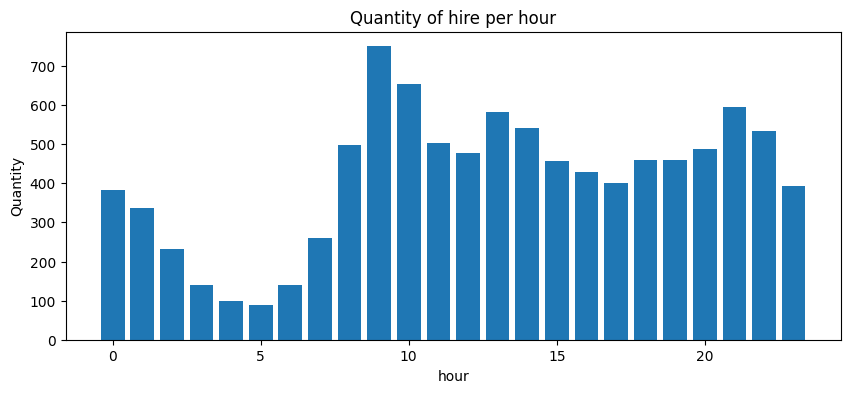

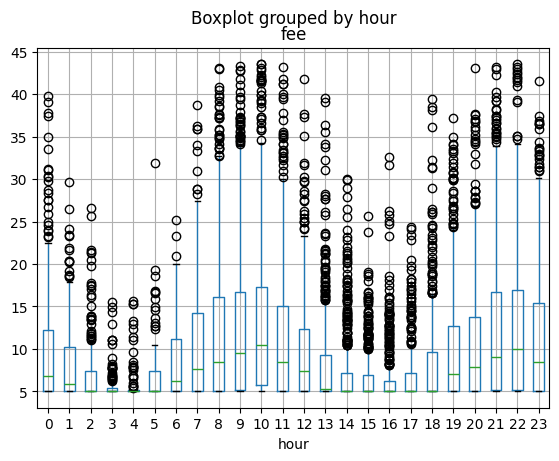

In [23]:
hire_per_hour = uber_data['hour'].value_counts().sort_index()
# hire_per_day.plot.bar(x=hire_per_day, y='day', rot=0)
plt.figure(figsize=(10, 4))
plt.bar(hire_per_hour.index, hire_per_hour.values)
plt.xlabel('hour')
plt.ylabel('Quantity')
plt.title('Quantity of hire per hour')

uber_data.boxplot(column = "fee",by = "hour")

#### Observation
The price varies greatly with the time of day and follows the variations in the number of vehicles hired, except in the afternoon when supply catches up with demand.

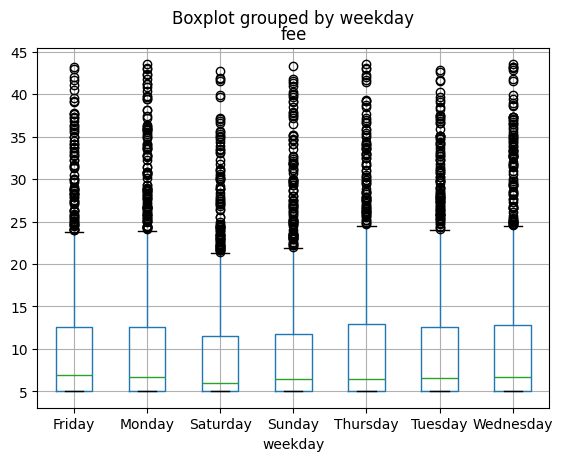

<Axes: title={'center': 'Vehicle hired per weekday'}, xlabel='weekday'>

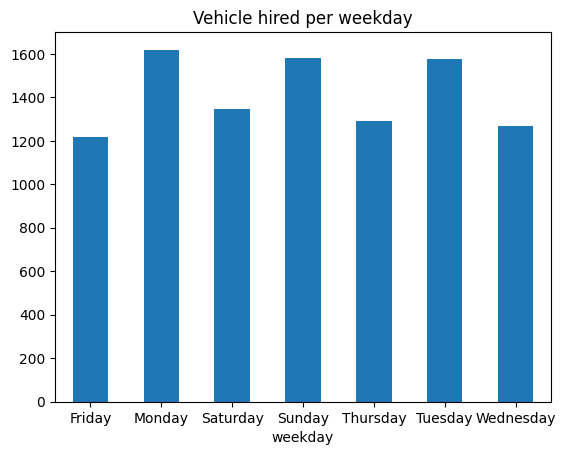

In [24]:
uber_data.boxplot(column = "fee",by = "weekday")
plt.show()
hire_per_weekday = uber_data['weekday'].value_counts().sort_index()
hire_per_weekday.plot.bar(x=hire_per_weekday, y='weekday', rot=0, title = "Vehicle hired per weekday")

# fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# # Boxplots of variables distributions grouped by the values of a third variable can be created using the option by. 
# boxplot = uber_data.boxplot(by='X')

# ax[0].boxplot(uber_data["fee"], uber_data["weekday"])
# ax[0].set_title("Fee Distribution by Weekday")
# ax[0].set_xlabel("Weekday")
# ax[0].set_ylabel("Fee")

# ax[1].bar(uber_data["weekday"], hire_per_weekday)
# ax[1].set_title("Hires per Weekday")
# ax[1].set_xlabel("Weekday")
# ax[1].set_ylabel("Number of Hires")
# plt.xticks(rotation=0)  # Rotate x-axis labels to avoid overlapping (optional)

# plt.subplot(211)
# uber_data.boxplot(column = "fee",by = "weekday")
# plt.subplot(212)
# hire_per_weekday.plot.bar(x=hire_per_weekday, y='weekday', rot=0)
# plt.tight_layout()
# plt.show()

In [25]:
uber_data.weekday = uber_data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
uber_data.head()

,timestamp,raw_start_location,raw_end_location,fee,datetime,day,hour,weekday
0,2023-01-18 22:21:35,"145, Rue Belliard, Paris 18e Arrondissement","315, Rue de Charenton, Paris 12e Arrondissement",16.57,2023-01-18 22:21:35,18,22,3
1,2023-01-19 20:31:27,"127, Rue de Charenton, Paris 12e Arrondissement","1, Square de la Dordogne, Paris 17e Arrondisse...",18.61,2023-01-19 20:31:27,19,21,4
2,2023-01-25 19:40:10,"8, Rue Richard Lenoir, Paris 11e Arrondissement","9, Rue de Cherbourg, Paris 15e Arrondissement",13.15,2023-01-25 19:40:10,25,20,3
3,2023-01-14 10:07:15,"6, Rue Guisarde, Paris 6e Arrondissement","28, Rue Guynemer, Paris 6e Arrondissement",5.00,2023-01-14 10:07:15,14,10,6
4,2023-01-01 21:23:11,"2, Rue Cognacq-Jay, Paris 7e Arrondissement","115, Boulevard du Montparnasse, Paris 6e Arron...",5.00,2023-01-01 21:23:11,1,21,0


In [26]:
meteo = meteo.dropna()
meteo['day'] = pd.to_datetime(meteo['timestamp']).dt.day
meteo['hour'] = (meteo['timestamp'].str.split().str[1].str.split(':').apply(lambda x: int(x[0]) + (int(x[1]) >= 30)) % 24)
uber_data = uber_data.merge(meteo, on=['day', 'hour'], how='left')
uber_data['rain_level'] = uber_data['rain_level'].astype(int)
uber_data['temperature'] = uber_data['temperature'].astype(int)
uber_data.head()

,timestamp_x,raw_start_location,raw_end_location,fee,datetime,day,hour,weekday,timestamp_y,rain_level,temperature
0,2023-01-18 22:21:35,"145, Rue Belliard, Paris 18e Arrondissement","315, Rue de Charenton, Paris 12e Arrondissement",16.57,2023-01-18 22:21:35,18,22,3,2023-01-18 22:00:00,0,7
1,2023-01-19 20:31:27,"127, Rue de Charenton, Paris 12e Arrondissement","1, Square de la Dordogne, Paris 17e Arrondisse...",18.61,2023-01-19 20:31:27,19,21,4,2023-01-19 21:00:00,0,10
2,2023-01-25 19:40:10,"8, Rue Richard Lenoir, Paris 11e Arrondissement","9, Rue de Cherbourg, Paris 15e Arrondissement",13.15,2023-01-25 19:40:10,25,20,3,2023-01-25 20:00:00,0,13
3,2023-01-14 10:07:15,"6, Rue Guisarde, Paris 6e Arrondissement","28, Rue Guynemer, Paris 6e Arrondissement",5.00,2023-01-14 10:07:15,14,10,6,2023-01-14 10:00:00,0,7
4,2023-01-01 21:23:11,"2, Rue Cognacq-Jay, Paris 7e Arrondissement","115, Boulevard du Montparnasse, Paris 6e Arron...",5.00,2023-01-01 21:23:11,1,21,0,2023-01-01 21:00:00,0,11


<Axes: title={'center': 'fee'}, xlabel='temperature'>

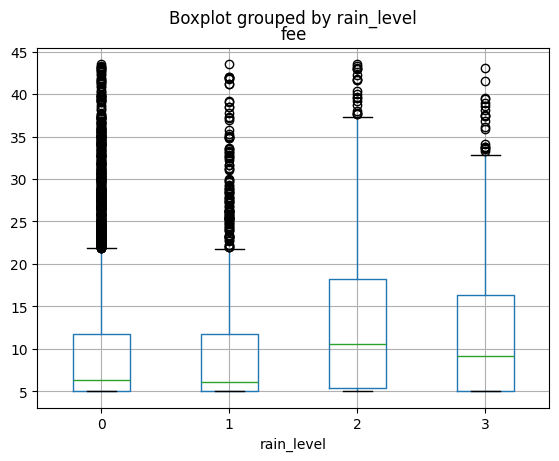

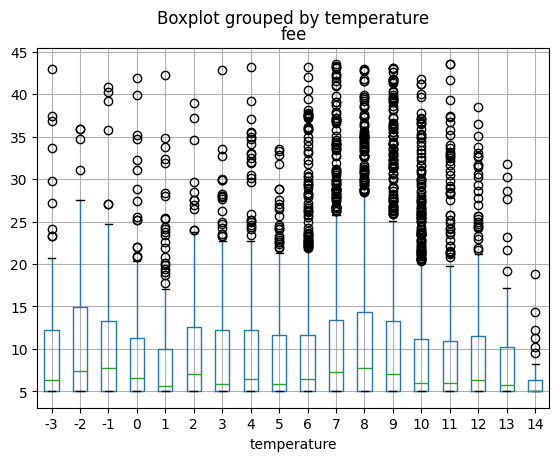

In [27]:
uber_data.boxplot(column = "fee",by = "rain_level")
uber_data.boxplot(column = "fee",by = "temperature")
# These features could be highly correlated with others

#uber_data.plot(uber_data['hour'], uber_data['fee'])

# Customize the plot (optional)
#plt.xlabel('Hours')
#plt.ylabel('Fee')
#plt.title('Fee vs Day hours')
#plt.grid(True)

# Show the plot
# plt.show()

In [28]:
# Create a column 'location' with an adress format similar to uber_data

# 'rep' are considered only when != NaN
paris_adress_info['location'] = paris_adress_info['numero'].astype(str) + paris_adress_info['rep'].fillna('').astype(str) + ", " + paris_adress_info['nom_voie'] + ", "+ paris_adress_info['nom_commune']
paris_adress_coord = paris_adress_info[['location', 'x', 'y', 'lon', 'lat']]
print(paris_adress_coord.isnull().sum())
rows_with_nan = paris_adress_coord[paris_adress_coord.isnull().any(axis=1)]
print(rows_with_nan)
paris_adress_coord.duplicated(subset=['location']).sum()
paris_adress_coord.info()
paris_adress_coord.head()

location    0
x           0
y           0
lon         0
lat         0
dtype: int64
Empty DataFrame
Columns: [location, x, y, lon, lat]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158048 entries, 0 to 158047
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   location  158048 non-null  object 
 1   x         158048 non-null  float64
 2   y         158048 non-null  float64
 3   lon       158048 non-null  float64
 4   lat       158048 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.0+ MB


,location,x,y,lon,lat
0,"1, Avenue du Général Lemonnier, Paris 1er Arro...",650852.91,6862571.27,2.330113,48.861299
1,"2, Avenue du Général Lemonnier, Paris 1er Arro...",650873.96,6862544.40,2.330403,48.861059
2,"3, Avenue du Général Lemonnier, Paris 1er Arro...",650864.26,6862595.30,2.330265,48.861516
3,"4, Avenue du Général Lemonnier, Paris 1er Arro...",650884.77,6862565.22,2.330548,48.861247
4,"5, Avenue du Général Lemonnier, Paris 1er Arro...",650876.06,6862619.33,2.330423,48.861733


In [29]:
# print(paris_adress_info.loc[(paris_adress_info['numero'] == 5) & (paris_adress_info['nom_voie'] == 'Rue Bois le Vent')])
# print(paris_adress_info.loc[paris_adress_info['nom_voie'] == 'Rue Bois le Vent'])
# print(paris_adress_info.loc[paris_adress_info['nom_voie'] == 'Rue de Bretagne'])
# print(paris_adress_info.loc[(paris_adress_info['numero'] == 5) & (paris_adress_info['nom_voie'] == 'Rue Bois le Vent')])
# 28, Rue Levert, Paris 20e Arrondissement
# 5, Rue Bois le Vent, Paris 16e Arrondissement

In [30]:
"""
Warning: 'uber_data' adresses uses curly apostrophe (not part of the standard ASCII character set) instead of simple apostrophe like in 
paris_adresse_info dtf.
Likely the CSV is encoded with UTF-8 (8 bits, standard ASCII) but effectively everything is ASCII until you hit the curly quotes and things go off the 
rails.
"""
# print(paris_adress_info.loc[(paris_adress_info['numero'] == 65) & (paris_adress_info['nom_voie'] == 'Rue de l’Ouest')])
# print(paris_adress_info.loc[(paris_adress_info['numero'] == 65) & (paris_adress_info['nom_voie'] == 'Rue de l\'Ouest')])
# print(paris_adress_info.loc[(paris_adress_info['nom_voie'] == 'Rue de l’Ouest')])
# print(paris_adress_coord.query('location == "25, Rue Decamps, Paris 16e Arrondissement"'))
# 25, Rue Decamps, Paris 16e Arrondissement
# 65, Rue de l’Ouest, Paris 14e Arrondissement

def replace_curly_apostrophes(text):
    """Replaces curly apostrophes with straight apostrophes.
    Args:
        text (str): The input text.
    Returns:
        str: The text with curly apostrophes replaced.
    """
    return text.replace("’", "'")

uber_data['raw_start_location'] = uber_data['raw_start_location'].apply(replace_curly_apostrophes)
uber_data['raw_end_location'] = uber_data['raw_end_location'].apply(replace_curly_apostrophes)


In [31]:
# Add the spatial data to our main dtf
"""
Note: Inner Join Can Increase Rows because of duplicate keys ! If a key value appears multiple times in one or both DataFrames, the resulting merged 
DataFrame will have multiple rows for each duplicate key combination. Check for duplicates in both dataframe first.
"""
# Make it case insensitivity
uber_data['raw_start_location'] = uber_data['raw_start_location'].str.lower()
uber_data['raw_end_location'] = uber_data['raw_end_location'].str.lower()
paris_adress_coord['location'] = paris_adress_coord['location'].str.lower()

merged_df = uber_data.merge(paris_adress_coord, left_on='raw_start_location', right_on='location', how='inner')
merged_df = merged_df.merge(paris_adress_coord, left_on='raw_end_location', right_on='location', how='inner')
merged_df.info()
"""
Not every adress from 'uber_data' seems to be present in 'paris_adress_coord': We lose a lot of informations. Some adresses are missing but for some
the problem comes from certains mistakes in the adresses of 'uber_data' like 'Quai de l'Hôtel de Ville' named 'Rue de l'Hôtel de Ville'.
"""
# print(merged_df.isnull().sum())
# rows_with_nan = merged_df[merged_df.isnull().any(axis=1)]
# print(rows_with_nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9797 entries, 0 to 9796
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp_x         9797 non-null   object        
 1   raw_start_location  9797 non-null   object        
 2   raw_end_location    9797 non-null   object        
 3   fee                 9797 non-null   float64       
 4   datetime            9797 non-null   datetime64[ns]
 5   day                 9797 non-null   int32         
 6   hour                9797 non-null   int64         
 7   weekday             9797 non-null   int64         
 8   timestamp_y         9797 non-null   object        
 9   rain_level          9797 non-null   int32         
 10  temperature         9797 non-null   int32         
 11  location_x          9797 non-null   object        
 12  x_x                 9797 non-null   float64       
 13  y_x                 9797 non-null   float64     

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_5672\1998926255.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_adress_coord['location'] = paris_adress_coord['location'].str.lower()


"\nNot every adress from 'uber_data' seems to be present in 'paris_adress_coord': We lose a lot of informations. Some adresses are missing but for some\nthe problem comes from certains mistakes in the adresses of 'uber_data' like 'Quai de l'Hôtel de Ville' named 'Rue de l'Hôtel de Ville'.\n"

In [32]:
merged_df.head()

,timestamp_x,raw_start_location,raw_end_location,fee,datetime,day,hour,weekday,timestamp_y,rain_level,...,location_x,x_x,y_x,lon_x,lat_x,location_y,x_y,y_y,lon_y,lat_y
0,2023-01-18 22:21:35,"145, rue belliard, paris 18e arrondissement","315, rue de charenton, paris 12e arrondissement",16.57,2023-01-18 22:21:35,18,22,3,2023-01-18 22:00:00,0,...,"145, rue belliard, paris 18e arrondissement",651135.58,6866436.68,2.333521,48.896081,"315, rue de charenton, paris 12e arrondissement",655601.50,6859456.32,2.395160,48.833631
1,2023-01-19 20:31:27,"127, rue de charenton, paris 12e arrondissement","1, square de la dordogne, paris 17e arrondisse...",18.61,2023-01-19 20:31:27,19,21,4,2023-01-19 21:00:00,0,...,"127, rue de charenton, paris 12e arrondissement",654544.56,6860793.65,2.380619,48.845584,"1, square de la dordogne, paris 17e arrondisse...",648668.21,6865621.23,2.299968,48.888556
2,2023-01-25 19:40:10,"8, rue richard lenoir, paris 11e arrondissement","9, rue de cherbourg, paris 15e arrondissement",13.15,2023-01-25 19:40:10,25,20,3,2023-01-25 20:00:00,0,...,"8, rue richard lenoir, paris 11e arrondissement",654681.23,6861809.48,2.382373,48.854729,"9, rue de cherbourg, paris 15e arrondissement",648935.23,6859256.02,2.304374,48.831336
3,2023-01-14 10:07:15,"6, rue guisarde, paris 6e arrondissement","28, rue guynemer, paris 6e arrondissement",5.00,2023-01-14 10:07:15,14,10,6,2023-01-14 10:00:00,0,...,"6, rue guisarde, paris 6e arrondissement",651179.85,6861527.13,2.334689,48.851934,"28, rue guynemer, paris 6e arrondissement",650998.16,6860928.97,2.332282,48.846541
4,2023-01-01 21:23:11,"2, rue cognacq-jay, paris 7e arrondissement","115, boulevard du montparnasse, paris 6e arron...",5.00,2023-01-01 21:23:11,1,21,0,2023-01-01 21:00:00,0,...,"2, rue cognacq-jay, paris 7e arrondissement",649022.81,6862643.13,2.305161,48.861803,"115, boulevard du montparnasse, paris 6e arron...",650826.33,6860433.81,2.329998,48.842075


In [33]:
# Add 'start_Arrondissement' and 'end_Arrondissement' columns

merged_df['start_arrondissement'] = merged_df['location_x'].str.extract(r'(\d+)(?:e|er) arrondissement').astype(int)  # (\d+)e does not cover 1er arr
merged_df['end_arrondissement'] = merged_df['location_y'].str.extract(r'(\d+)(?:e|er) arrondissement').astype(int)
# rows_with_nan = merged_df[merged_df.isnull().any(axis=1)]
# print(rows_with_nan)
#merged_df.info()
#merged_df.head()

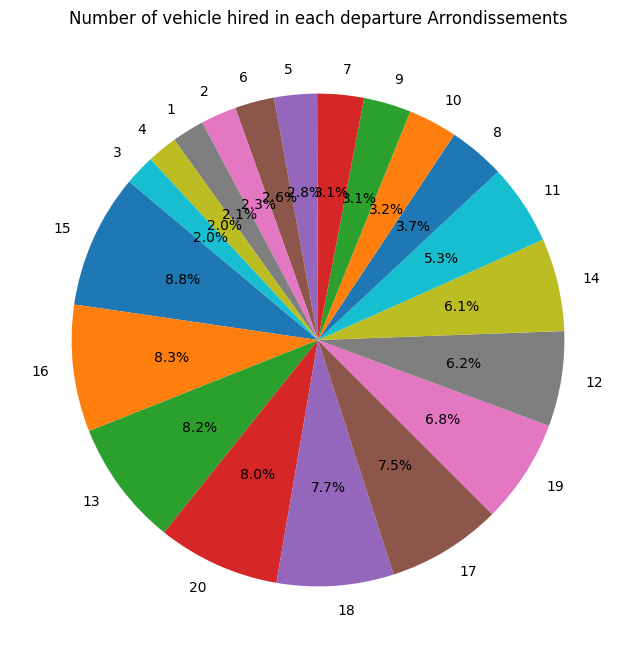

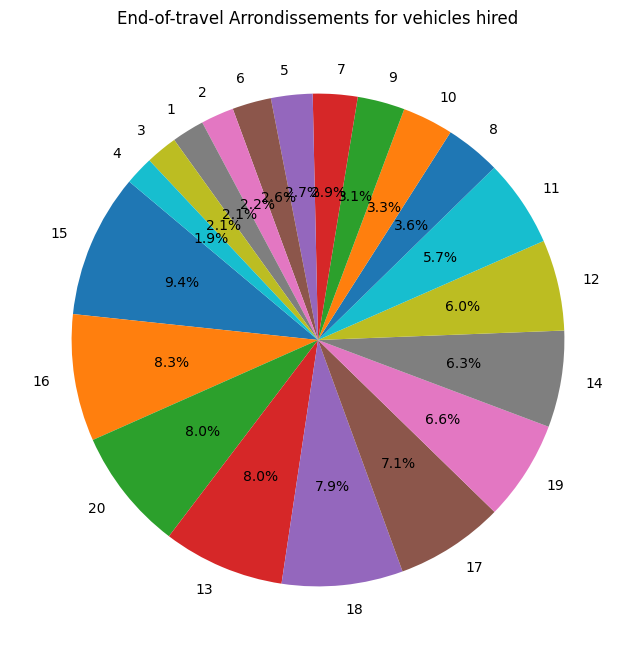

In [34]:
start_arr_counts = merged_df['start_arrondissement'].value_counts()
end_arr_counts = merged_df['end_arrondissement'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(start_arr_counts, labels=start_arr_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of vehicle hired in each departure Arrondissements')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(end_arr_counts, labels=end_arr_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('End-of-travel Arrondissements for vehicles hired')
plt.show()

<Axes: xlabel='end_arrondissement', ylabel='start_arrondissement'>

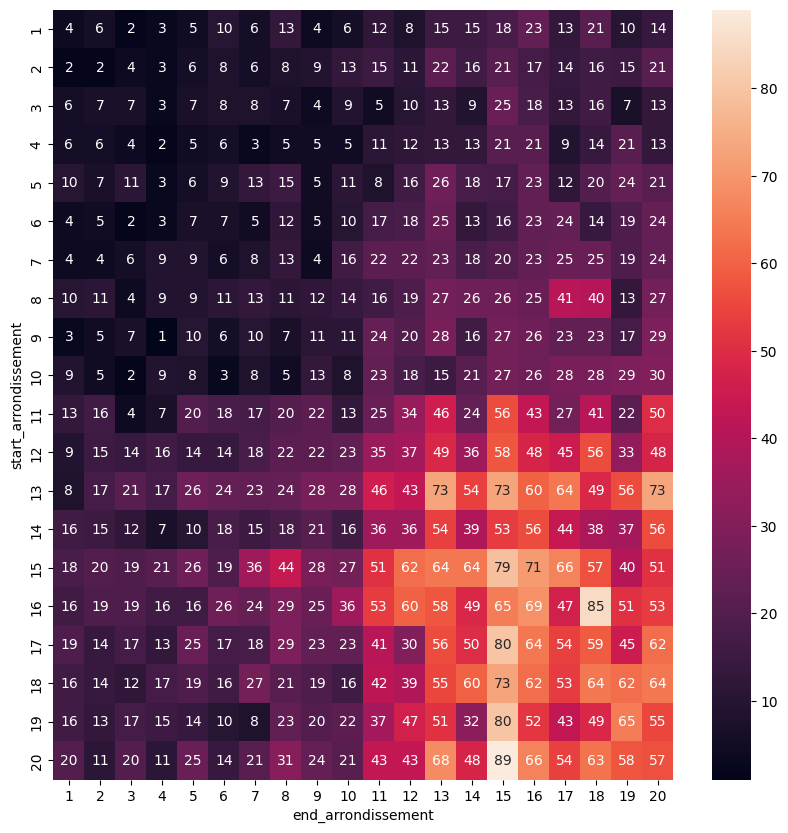

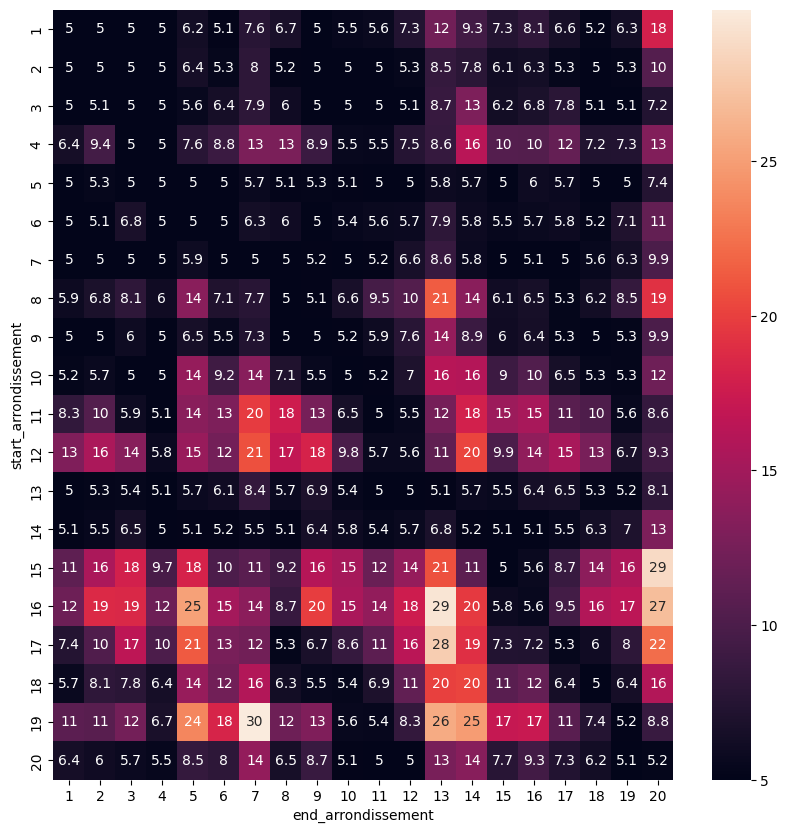

In [35]:
# merged_df['arr-to-arr'] = merged_df['start_Arrondissement'] + " to " + merged_df['end_Arrondissement']
"""
Create a pivot table to count occurrences:
merged_df.groupby(['start_Arrondissement', 'end_Arrondissement']).size(): Groups the DataFrame by 'start_Arrondissement' and 'end_Arrondissement' and counts 
the occurrences of each combination. Function 'groupby.size()' = return the number of rows in each group as a Series or dtf).
.unstack(fill_value=0): Reshapes the grouped DataFrame into a pivot table, using 'start_Arrondissement' as the index and 'end_Arrondissement' as the 
column names. Missing combinations are filled with 0.
This pivot table 'df_arr' represents the desired output, where the index values are unique 'start_Arrondissement' values, the column names are unique 
'end_Arrondissement' values, and the cell values indicate the number of times that specific 'start_Arrondissement' and 'end_Arrondissement' combination 
occurred in the original DataFrame.
"""
df_arr = merged_df.groupby(['start_arrondissement', 'end_arrondissement']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_arr, annot=True, ax=ax, fmt="d")  # fmt="d" to avoid scientific notation of big numbers
"""
Create a pivot table to calculate the sum of 'fee' for each combination of 'start_Arrondissement' and 'end_Arrondissement':
index='start_Arrondissement': The rows of the pivot table are indexed by the unique values in the 'start_Arrondissement' column.
columns='end_Arrondissement': The columns of the pivot table are indexed by the unique values in the 'end_Arrondissement' column.
values='fee': The values in the pivot table are the sum of the 'fee' values for each combination of 'start_Arrondissement' and 'end_Arrondissement'.
"""
# Create a pivot table to calculate the sum of 'fee' for each combination of 'start_Arrondissement' and 'end_Arrondissement'
df_fee_arr = merged_df.pivot_table(index='start_arrondissement', columns='end_arrondissement', values='fee', aggfunc='mean')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_fee_arr, annot=True, ax=ax)

In [36]:
import geopy.distance
merged_df['distance']=[round(geopy.distance.distance((merged_df.lat_x[i], merged_df.lon_x[i]),(merged_df.lat_y[i], merged_df.lon_y[i])).m,1) for i in merged_df.index]
merged_df.head()

,timestamp_x,raw_start_location,raw_end_location,fee,datetime,day,hour,weekday,timestamp_y,rain_level,...,lon_x,lat_x,location_y,x_y,y_y,lon_y,lat_y,start_arrondissement,end_arrondissement,distance
0,2023-01-18 22:21:35,"145, rue belliard, paris 18e arrondissement","315, rue de charenton, paris 12e arrondissement",16.57,2023-01-18 22:21:35,18,22,3,2023-01-18 22:00:00,0,...,2.333521,48.896081,"315, rue de charenton, paris 12e arrondissement",655601.50,6859456.32,2.395160,48.833631,18,12,8287.6
1,2023-01-19 20:31:27,"127, rue de charenton, paris 12e arrondissement","1, square de la dordogne, paris 17e arrondisse...",18.61,2023-01-19 20:31:27,19,21,4,2023-01-19 21:00:00,0,...,2.380619,48.845584,"1, square de la dordogne, paris 17e arrondisse...",648668.21,6865621.23,2.299968,48.888556,12,17,7605.8
2,2023-01-25 19:40:10,"8, rue richard lenoir, paris 11e arrondissement","9, rue de cherbourg, paris 15e arrondissement",13.15,2023-01-25 19:40:10,25,20,3,2023-01-25 20:00:00,0,...,2.382373,48.854729,"9, rue de cherbourg, paris 15e arrondissement",648935.23,6859256.02,2.304374,48.831336,11,15,6288.6
3,2023-01-14 10:07:15,"6, rue guisarde, paris 6e arrondissement","28, rue guynemer, paris 6e arrondissement",5.00,2023-01-14 10:07:15,14,10,6,2023-01-14 10:00:00,0,...,2.334689,48.851934,"28, rue guynemer, paris 6e arrondissement",650998.16,6860928.97,2.332282,48.846541,6,6,625.2
4,2023-01-01 21:23:11,"2, rue cognacq-jay, paris 7e arrondissement","115, boulevard du montparnasse, paris 6e arron...",5.00,2023-01-01 21:23:11,1,21,0,2023-01-01 21:00:00,0,...,2.305161,48.861803,"115, boulevard du montparnasse, paris 6e arron...",650826.33,6860433.81,2.329998,48.842075,7,6,2852.3


              fee  distance
fee       1.00000   0.50181
distance  0.50181   1.00000


<Axes: title={'center': 'Fee vs Distance (m)'}, xlabel='distance', ylabel='fee'>

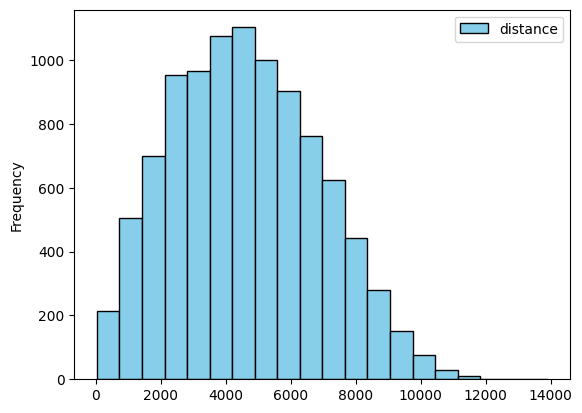

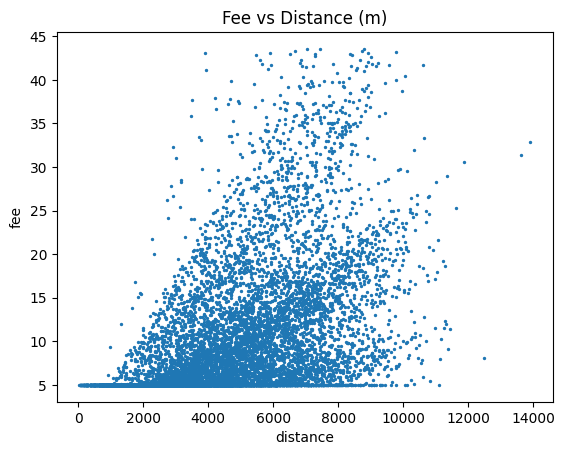

In [37]:
# Correlation: fee with distances
print(merged_df[['fee', 'distance']].corr())

merged_df.plot(kind = "hist",y = "distance", bins= 20, range = (merged_df['distance'].astype(int).min(), merged_df['distance'].astype(int).max()), color='skyblue', edgecolor='black')

merged_df.plot.scatter(x='distance', y='fee', title='Fee vs Distance (m)', s=2)

In [38]:
# Print some correlations
print(merged_df[['fee', 'hour', 'rain_level', 'temperature', 'start_arrondissement',	'end_arrondissement', 'weekday', 'x_x', 'y_x', 'lon_x', 
                 'lat_x', 'x_y', 'y_y', 'lon_y', 'lat_y', 'distance']].corr())
# corr_matrix["fee"].sort_values(ascending=False)
"""
Observations:
- x and y have correlation of 1 with longitude and latitude
- fee is highly correlated with distance
- fee varies only slightly with 'temperature' or 'weekday'
"""

                           fee      hour  rain_level  temperature  \
fee                   1.000000  0.049187    0.141473    -0.003673   
hour                  0.049187  1.000000    0.028412     0.093581   
rain_level            0.141473  0.028412    1.000000     0.120482   
temperature          -0.003673  0.093581    0.120482     1.000000   
start_arrondissement  0.208015  0.019994   -0.019262    -0.005307   
end_arrondissement    0.014057 -0.008168   -0.003770    -0.004058   
weekday              -0.006030 -0.012443    0.028027     0.027413   
x_x                  -0.155478 -0.004120    0.004425    -0.002429   
y_x                   0.125343  0.002545   -0.003923    -0.000361   
lon_x                -0.156345 -0.004135    0.004452    -0.002425   
lat_x                 0.123579  0.002502   -0.003865    -0.000385   
x_y                   0.084194  0.005984   -0.015056    -0.007302   
y_y                  -0.226185 -0.002701    0.005617     0.004802   
lon_y                 0.085738  0.

"\nObservations:\n- x and y have correlation of 1 with longitude and latitude\n- fee is highly correlated with distance\n- fee varies only slightly with 'temperature' or 'weekday'\n"

In [39]:
# Feature selection
"""
Multiple regression problem since we will use multiple features to make a prediction.
It is also a univariate regression problem since we are only trying to predict a single value for each ride in our case.
"""
## One-hot encoding of weekday because values of 0 and 6 are closer than 4 and 6. Same for hours as 0 and 23 are closer than 20 and 23.
# clean_dataset = pd.get_dummies(
#     merged_df, 
#     columns= ['hour', 'start_arrondissement', 'end_arrondissement'], # 'weekday',
#     prefix=['hour', 'start_arr', 'end_arr'], # 'weekday', 
#     dtype=int
# )
# clean_dataset = clean_dataset.drop(['timestamp_x','timestamp_y','raw_start_location','raw_end_location','datetime','day','location_x','location_y','x_x', 
#                              'y_x', 'x_y', 'y_y', 'weekday'], axis=1)  # 'weekday'
clean_dataset = merged_df.drop(['timestamp_x','timestamp_y','raw_start_location','raw_end_location','datetime','day','location_x','location_y','x_x', 
                              'y_x', 'x_y', 'y_y', 'temperature', 'weekday'], axis=1)  # 'weekday', 'lon_x', 'lat_x', 'lon_y', 'lat_y', 'temperature'
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9797 entries, 0 to 9796
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fee                   9797 non-null   float64
 1   hour                  9797 non-null   int64  
 2   rain_level            9797 non-null   int32  
 3   lon_x                 9797 non-null   float64
 4   lat_x                 9797 non-null   float64
 5   lon_y                 9797 non-null   float64
 6   lat_y                 9797 non-null   float64
 7   start_arrondissement  9797 non-null   int32  
 8   end_arrondissement    9797 non-null   int32  
 9   distance              9797 non-null   float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 650.7 KB


1.9704607242837182
0.3374724604103789


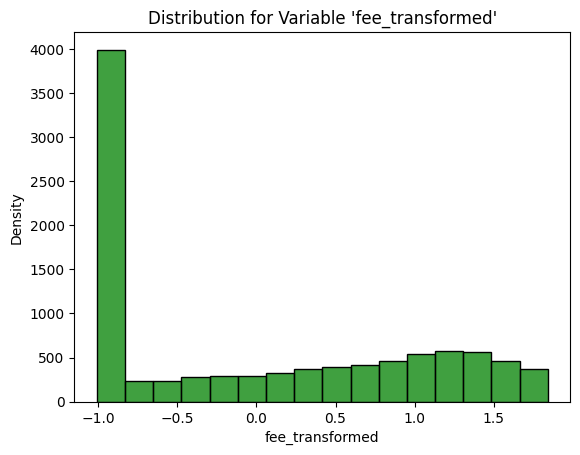

'\nThe transformation is not really convincing, the target variable is still skewed. Not worth to apply the transformation.\n'

In [40]:
## Split between train/Test
"""
Target variable 'fee' is skewed. We will apply a transformation on it to make it more gaussian.
Another option could have been to categorizes the 'fee' target to then create stratified balanced dataset representating the various categories of fee.
"""
# from sklearn.model_selection import StratifiedShuffleSplit
# clean_dataset["fee_cat"] = pd.cut(clean_dataset["fee"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
# clean_dataset["fee_cat"].hist()
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(clean_dataset, clean_dataset["fee_cat"]):
# strat_train_set = clean_dataset.loc[train_index]
# strat_test_set = clean_dataset.loc[test_index]
# strat_test_set["fee_cat"].value_counts() / len(strat_test_set)
print(clean_dataset['fee'].skew())
from sklearn.preprocessing import PowerTransformer
# clean_dataset['fee_transformed'] = np.log1p(clean_dataset['fee'])
# clean_dataset['fee_transformed'] = np.sqrt(clean_dataset['fee'])
clean_dataset['fee_transformed'] = ColumnTransformer([
    ("fee_transform", PowerTransformer(method='box-cox', standardize=True), ['fee'])
]).fit_transform(clean_dataset)  # box-cox  yeo-johnson
# clean_dataset.plot(kind = "hist",y = "fee_transformed", bins= 50, range = (clean_dataset['fee_transformed'].astype(int).min(), clean_dataset['fee_transformed'].astype(int).max()), color='skyblue', edgecolor='black')
print(clean_dataset['fee_transformed'].skew())
sns.histplot(clean_dataset['fee_transformed'],bins='auto',color='green')
plt.title("Distribution for Variable 'fee_transformed'")
plt.ylabel("Density")
plt.show()
"""
The transformation is not really convincing, the target variable is still skewed. Not worth to apply the transformation.
"""

In [41]:
X = clean_dataset.drop(['fee', 'fee_transformed'], axis=1)  # Features
# X = clean_dataset.drop(['fee', 'fee_transformed'], axis=1)
y = clean_dataset['fee']  # Target variable
y2 = clean_dataset['fee_transformed']  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  # y2 to compare transformed fee with raw fee
print(x_train.shape)
print(x_test.shape)

(7837, 9)
(1960, 9)


In [42]:
"""
We quickly test a linear regressor on the data
"""
from sklearn.metrics import mean_squared_error, root_mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
some_data = x_train.iloc[:5]
some_labels = y_train.iloc[:5]

fee_predictions = lin_reg.predict(some_data)
print("Predictions:", fee_predictions)
print("Labels:", list(some_labels))

lin_mse = mean_squared_error(some_labels, fee_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_mse)
print(lin_rmse)

fee_pred = lin_reg.predict(x_test)
print("Predictions:", fee_pred[:10])
print("Labels:", list(y_test[:10]))
print(root_mean_squared_error(y_test, fee_pred))

Predictions: [ 4.67111367 21.248816    9.1575235   7.03501549  5.48218858]
Labels: [5.0, 20.04, 9.86, 5.0, 5.0]
1.2873338829404841
1.1346073695073922
Predictions: [ 8.4885319   6.2614378   5.30300554  7.13797213  7.10704053  7.60259236
 13.50253142  7.65085533 13.23613406 13.73223548]
Labels: [5.0, 5.0, 5.0, 5.8, 5.0, 5.48, 11.93, 8.83, 9.52, 16.78]
5.202714836438384


In [43]:
"""
Here we define our custom scikit-learn Classifiers and Transformers:
- XGBoost regressors wrapped in a scikit Classifier to fix the incompatibility issue with scikit-learn >1.6 and the XGBoost library 
(see https://github.com/dmlc/xgboost/issues/11093 for details).
- Transformer to drop feature column from dataframes.
"""
import xgboost as xg 
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

class SklXGBRegressor(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = xg.XGBRegressor(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

class SklXGBRFRegressor(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = xg.XGBRFRegressor(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

class ColumnDropper(BaseEstimator, TransformerMixin):
    """
    A custom scikit-learn transformer to drop specified feature columns from a DataFrame.

    Attributes:
        features_to_drop (list): A list of column names to drop.
    Raises:
        TypeError: If features_to_drop is not a list.
        ValueError: If any feature in features_to_drop is not found in the DataFrame.
    """

    def __init__(self, features_to_drop):
        if not isinstance(features_to_drop, list):
            raise TypeError("features_to_drop must be a list.")
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        """
        Fits the transformer (does nothing in this case).

        Args:
            X (pd.DataFrame): The input DataFrame.
            y (pd.Series or None): The target variable (not used).
        Returns:
            self: The fitted transformer.
        """
        for feature in self.features_to_drop:
            if feature not in X.columns:
                raise ValueError(f"Feature '{feature}' not found in the DataFrame.")
        return self

    def transform(self, X):
        """
        Drops the specified feature columns from the DataFrame.

        Args:
            X (pd.DataFrame): The input DataFrame.
        Returns:
            pd.DataFrame: The DataFrame with the specified columns dropped.
        """
        X_transformed = X.drop(columns=self.features_to_drop, errors='ignore')
        return X_transformed

class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop=None):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.features_to_drop, axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, SelectKBest
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import r_regression, f_regression, mutual_info_regression, SelectFromModel
from sklearn.linear_model import Perceptron

('drop_col', FeatureDropper(features_to_drop=['weekday', 'temperature']))

numeric_features = ['rain_level', 'lon_x', 'lat_x', 'lon_y', 'lat_y', 'distance'] # 'temperature'
numeric_transformer = Pipeline(
    steps=[('std', StandardScaler())]
)
categorical_features = ['hour', 'start_arrondissement', 'end_arrondissement']  # 'weekday'
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")))
    ]  # ('polfeat2', PolynomialFeatures(degree=2)), ("selector", SelectPercentile(f_regression, percentile=90)) test with MUTUAL INFO REGRESSION
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# ('std', StandardScaler()),
# ('minmax', MinMaxScaler()),
# ('robust_scaler', RobustScaler())

#('pca', PCA())
#('kpca', KernelPCA())
# ('rbfpca', KernelPCA(kernel="rbf"))   # far too slow

# ('polfeat2', PolynomialFeatures(degree=2))

# ("selector", SelectKBest(f_regression, k=2))  # metrics: r_regression, f_regression, mutual_info_regression for sparse matrices
# ("selector", VarianceThreshold()) 
# ("selector", SelectPercentile(r_regression, percentile=50))
# ('selector', SelectFromModel(Lasso()))  # LinearSVC(penalty="l1"), ExtraTreesClassifier(n_estimators=50)
# SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=3)
# SelectFromModel(permutation_importance(regressor[0], X, y, cv=5),threshold=0.005)
regressor_list = [
    # ('lin_reg', LinearRegression()),
    # ('Lasso', Lasso()),
    # ('Ridge', Ridge()),
    # ('ElasticNet', ElasticNet()),
    # ('Lasso_2', Lasso(alpha =0.0005)),
    # ('ElasticNet_2', ElasticNet(alpha=0.0005, l1_ratio=.9)),
    # ('kernelRidge', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)),
    # ('knn', KNeighborsRegressor()),
    # ('knn8', KNeighborsRegressor(n_neighbors=8)),
    # ('knn13', KNeighborsRegressor(n_neighbors=13)),
    # ('linSVR', LinearSVR()),
    # ('svr', SVR(kernel='rbf',C=1)),
    # ('svr_c5', SVR(kernel='rbf',C=5)),
    # ('svr_pol', SVR(kernel='poly')),
    # ('DTR', DecisionTreeRegressor()),
    # ('RF10', RandomForestRegressor(n_estimators=10)),
    ('RF100', RandomForestRegressor(n_estimators=100)),
    ('Adab100', AdaBoostRegressor(n_estimators=100)),
    ('GBR', GradientBoostingRegressor()),
    ('xgbr_10', SklXGBRegressor(objective ='reg:squarederror', n_estimators = 10)),
    ('xgbr', SklXGBRegressor()),
    # [('xgbrf_10', SklXGBRFRegressor(objective ='reg:squarederror', n_estimators = 10))],
    # [('xgbrf', SklXGBRFRegressor())],
    ('cbr', CatBoostRegressor(loss_function='RMSE', logging_level='Silent')),
    ('lgbmr', LGBMRegressor(metric='rmse')),
    # [('GBR_2', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
    #                                      min_samples_split=10, loss='huber'))],  # With huber loss that makes it robust to outliers
    # [('xgbr_2', SklXGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,
    #                             reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1, nthread = -1))],
    # [('lgbmr_2', LGBMRegressor(objective='regression',num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin = 55, bagging_fraction = 0.8,
    #                          bagging_freq = 5, feature_fraction = 0.2319, feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf =6, 
    #                          min_sum_hessian_in_leaf = 11))],
    # ('perceptron', Perceptron(),
    # ('mlp', MLPRegressor(hidden_layer_sizes = (100,), max_iter=200)),
    # ('mlp50', MLPRegressor(hidden_layer_sizes = (50,), max_iter=200)),
    # ('mlp_2L', MLPRegressor(hidden_layer_sizes = [50, 10], max_iter=200)),
    # [('mlp_50', MLPRegressor(hidden_layer_sizes = [100, 50]))],
]


scoring = 'neg_root_mean_squared_error'  # neg_mean_squared_error  r2_score
for regressor in regressor_list:
    clf = Pipeline(
    steps=[regressor]  # regressor  ("preprocessor", preprocessor)  ('drop_col', FeatureDropper(features_to_drop=['weekday', 'temperature'])) [regressor]
    )
    scores = cross_val_score(clf, X, y, scoring=scoring, cv=5)
    pos_score = -scores
    print(list(clf.named_steps.keys()))
    print(f"Mean: {round(pos_score.mean(), 2)}±{round(pos_score.std(), 2)}")
    # feature_importance = permutation_importance(clf.fit(x_train, y_train), x_test, y_test, n_repeats=5)
    # print("Feature importances: ")
    # for i in range(len(feature_importance.importances_mean)):
    #     print(f"{round(feature_importance.importances_mean[i], 2)}±{round(feature_importance.importances_std[i], 2)}")

['RF100']
Mean: 3.43±0.14
['GBR']
Mean: 3.68±0.12
['xgbr_10']
Mean: 3.57±0.13


C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\U

['xgbr']
Mean: 2.9±0.11
['cbr']
Mean: 2.73±0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 7837, number of used features: 9
[LightGBM] [Info] Start training from score 9.950540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 7837, number of used features: 9
[LightGBM] [Info] Start training from score 9.940170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 7838, number of use

C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.Ou

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 7838, number of used features: 9
[LightGBM] [Info] Start training from score 9.918620
['lgbmr']
Mean: 2.82±0.12


C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.Ou

## Linear Models:

Linear Regression (lin_reg) Simple but effective when relationships are mostly linear (which seems to be your case after feature engineering)
Ridge (Ridge) Works well when most features are useful (your case)
Lasso (Lasso, Lasso_2) Good at feature selection, which matches your clear feature importance hierarchy

Standardization
One-hot encoding
Can benefit from PolynomialFeatures
Feature selection helps with multicollinearity

In [ ]:
# Linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


# Define pipeline configs
pipeline_configs = [
    # 1. std and 3 encoded + polfeat2 + remove weekday/temp
    {
        "name": "std+polfeat2+3enc+drop_weekday_temp",
        "num": Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday', 'temperature']
    },
    # 2. robustscaler and 3 encoded + polfeat2 + remove weekday/temp
    {
        "name": "robust+polfeat2+3enc+drop_weekday_temp",
        "num": Pipeline([('scaler', RobustScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday', 'temperature']
    },
    # 3. std and 3 encoded + remove weekday/temp
    {
        "name": "std+3enc+drop_weekday_temp",
        "num": Pipeline([('scaler', StandardScaler())]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday', 'temperature']
    },
    # 4. std+polfeat2 and 3 encoded+polfeat2+remove weekday/temp
    {
        "name": "std+polfeat2+3enc+polfeat2+drop_weekday_temp",
        "num": Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore')), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday', 'temperature']
    },
    # 5. robustscaler+polfeat2 and 3 encoded+polfeat2+remove weekday/temp
    {
        "name": "robust+polfeat2+3enc+polfeat2+drop_weekday_temp",
        "num": Pipeline([('scaler', RobustScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore')), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday', 'temperature']
    },
    # 6. std+polfeat2 and 3 encoded + remove weekday/temp
    {
        "name": "std+polfeat2+3enc+drop_weekday_temp",
        "num": Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday', 'temperature']
    },
    # 7. std+polfeat2 and 3 encoded + remove weekday
    {
        "name": "std+polfeat2+3enc+drop_weekday",
        "num": Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement'],
        "drop": ['weekday']
    },
    # 8. std and 4 encoded + polfeat2
    {
        "name": "std+4enc+polfeat2",
        "num": Pipeline([('scaler', StandardScaler())]),
        "cat": Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore')), ('poly', PolynomialFeatures(degree=2, include_bias=False))]),
        "cat_features": ['hour', 'start_arrondissement', 'end_arrondissement', 'weekday'],
        "drop": ['temperature']
    },
]

linear_models = [
    ('lin_reg', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso(alpha=0.0005)),
]

scoring = 'neg_root_mean_squared_error'

for cfg in pipeline_configs:
    print(f"\nPipeline: {cfg['name']}")
    # Prepare features
    X_proc = X.drop(columns=cfg['drop'], errors='ignore')
    num_features = [col for col in X_proc.columns if col not in cfg['cat_features']]
    preprocessor = ColumnTransformer([
        ('num', cfg['num'], num_features),
        ('cat', cfg['cat'], cfg['cat_features'])
    ])
    for name, model in linear_models:
        clf = Pipeline([
            ('preprocessor', preprocessor),
            ('reg', model)
        ])
        scores = cross_val_score(clf, X_proc, y, scoring=scoring, cv=5)
        pos_score = -scores
        print(f"{name}: Mean: {round(pos_score.mean(), 2)}±{round(pos_score.std(), 2)}")


Pipeline: std+polfeat2+3enc+drop_weekday_temp
lin_reg: Mean: 3.96±0.05
Ridge: Mean: 3.97±0.05


c:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+02, tolerance: 4.069e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.777e+02, tolerance: 4.065e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Utilisateur\Documents\dev_projects\venv_data\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

Lasso: Mean: 3.97±0.05

Pipeline: robust+polfeat2+3enc+drop_weekday_temp
lin_reg: Mean: 3.96±0.05
Ridge: Mean: 3.97±0.05
Lasso: Mean: 3.97±0.05

Pipeline: std+3enc+drop_weekday_temp
lin_reg: Mean: 4.1±0.07
Ridge: Mean: 4.1±0.07
Lasso: Mean: 4.1±0.07

Pipeline: std+polfeat2+3enc+polfeat2+drop_weekday_temp
lin_reg: Mean: 3.31±0.03
Ridge: Mean: 3.25±0.03


In [ ]:
# Distance-based models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

distance_models = [
    ('knn', KNeighborsRegressor()),
    ('knn8', KNeighborsRegressor(n_neighbors=8)),
    ('knn13', KNeighborsRegressor(n_neighbors=13)),
    ('svr', SVR(kernel='rbf', C=1)),
    ('svr_c5', SVR(kernel='rbf', C=5)),
    ('svr_pol', SVR(kernel='poly')),
    ('kernelRidge', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)),
]

scoring = 'neg_root_mean_squared_error'
for name, model in distance_models:
    clf = Pipeline(steps=[('reg', model)])
    scores = cross_val_score(clf, X, y, scoring=scoring, cv=5)
    pos_score = -scores
    print(f"{name}: Mean: {round(pos_score.mean(), 2)}±{round(pos_score.std(), 2)}")

In [ ]:
# Tree-based models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

tree_models = [
    ('RF100', RandomForestRegressor(n_estimators=100)),
    ('Adab100', AdaBoostRegressor(n_estimators=100)),
    ('GBR', GradientBoostingRegressor()),
    ('cbr', CatBoostRegressor(loss_function='RMSE', logging_level='Silent')),
    ('lgbmr', LGBMRegressor(metric='rmse')),
]

scoring = 'neg_root_mean_squared_error'
for name, model in tree_models:
    clf = Pipeline(steps=[('reg', model)])
    scores = cross_val_score(clf, X, y, scoring=scoring, cv=5)
    pos_score = -scores
    print(f"{name}: Mean: {round(pos_score.mean(), 2)}±{round(pos_score.std(), 2)}")

In [ ]:
# Neural network models
from sklearn.neural_network import MLPRegressor

nn_models = [
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), max_iter=200)),
    ('mlp50', MLPRegressor(hidden_layer_sizes=(50,), max_iter=200)),
    ('mlp_2L', MLPRegressor(hidden_layer_sizes=[50, 10], max_iter=200)),
]

scoring = 'neg_root_mean_squared_error'
for name, model in nn_models:
    clf = Pipeline(steps=[('reg', model)])
    scores = cross_val_score(clf, X, y, scoring=scoring, cv=5)
    pos_score = -scores
    print(f"{name}: Mean: {round(pos_score.mean(), 2)}±{round(pos_score.std(), 2)}")

5 encoding, std+pca+polfeat2, onehotencoding ==> slightly better than std
5 encoding, std+polfeat2+pca, onehotencoding ==> same as std+pca+polfeat2
no encoding, std => worse even for ensembles forest
5 encoding, std+polfeat2, onehotencoding ==> lin reg is better, others are worse

5 encoding, std+polfeat2, onehotencoding+polfeat2 ==> 

4 encoding, std, onehotencoding+polfeat2 => better than std especially for linreg, worse mlp

## Linear Models:

Linear Regression (lin_reg) Simple but effective when relationships are mostly linear (which seems to be your case after feature engineering)
Ridge (Ridge) Works well when most features are useful (your case)
Lasso (Lasso, Lasso_2) Good at feature selection, which matches your clear feature importance hierarchy
ElasticNet (ElasticNet, ElasticNet_2) => remove it

Standardization
One-hot encoding
Can benefit from PolynomialFeatures
Feature selection helps with multicollinearity

### Config

- 4 encoding, std, onehotencoding+polfeat2 
=> better than std especially for linreg, worse mlp
linreg=3.46, ridge=3.38, lasso_2=3.34

- 3 encodings, std, onehotencode, remove weekday/temp  => better than classic 5 encodings
COULD NOT REPLICATE ?? SOMETHING WAS WRONG WITH THE CONFIG
linreg=3.41, ridge=3.35, lasso_2=3.33

- 3 encodings, robustscaler, onehotencode+polfeat2, remove weekday/temp 
=> lin reg as good as simple std no week/temp

- 3 encodings, robustscaler+polfeat2, onehotencode+polfeat2, remove weekday/temp  => better lin reg
3 encodings, std, onehotencode+polfeat2, remove weekday/temp  => same as before

- 3 encodings, std+polfeat2, one hot+polfeat2 
=> lin reg, ridge, lasso better

- polfeature degree = 2 + encoding hour/arr + remove weekday
=>
['std', 'polfeature_2', 'lin_reg'] = 2.77±0.09 but too slow
['std', 'polfeature_2', 'Ridge']  = 2.77±0.09
['robust_scaler', 'polfeature_2', 'Ridge'] = 2.69±0.08

## Distance-Based Models:

KNN (knn, knn8, knn13)
SVR (svr, svr_c5, svr_pol)
Kernel Ridge (kernelRidge)

Standardization/RobustScaler (your tests show RobustScaler performed better)
One-hot encoding for categorical variables
PCA can help with dimensionality
Essential to scale features due to distance calculations

5 encodings, robustscaler, onehotencode > for knn/knn8

3 encodings, std, onehotencode, remove weekday/temp  => better than classic 5 encodings
COULD NOT REPLICATE ?? SOMETHING WAS WRONG WITH THE CONFIG
['preprocessor', 'knn']
Mean: 3.97±0.04
['preprocessor', 'knn8']
Mean: 3.96±0.08
['preprocessor', 'knn13']
Mean: 3.99±0.08

3 encodings, robustscaler, onehotencode, remove weekday/temp  => Better svr_c5, kernelRidge, svr_pol
['preprocessor', 'knn']
Mean: 3.96±0.01
['preprocessor', 'knn8']
Mean: 3.96±0.08
['preprocessor', 'knn13']
Mean: 3.98±0.07

3 encodings, robust, onehotencode+selectpercentile90freg, remove weekday/temp => better kernelRidge, svr_c5
['preprocessor', 'kernelRidge']
Mean: 3.74±0.06
['preprocessor', 'knn']     >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Mean: 3.89±0.07
['preprocessor', 'knn8']
Mean: 3.91±0.08
['preprocessor', 'knn13']
Mean: 3.95±0.07
['preprocessor', 'svr_c5']
Mean: 2.78±0.06     >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



## Tree-based models:

Random Forest (RF100)
AdaBoost (Adab100)
Gradient Boosting (GBR)
XGBoost (xgbr, xgbr_10)
CatBoost (cbr)
LightGBM (lgbmr)

One-hot encoding for categorical variables (hour, arrondissements)
No scaling needed
Can benefit from feature selection

no encoding no std (adding VarianceThreshold does not change anything)
3 encoding, no week/temperature
no encoding, polfeat2 => everything worse than no encoding/std

5 encoding, no std  => everything significantly worse than no encoding/std

5 encoding, no std, encode+polfeat2 => significantly worse

## MLP:

MLP (mlp, mlp50, mlp_2L)

Standardization
One-hot encoding
PCA can help
Benefits from feature scaling and dimensionality reduction

no encoding, std => signi worse

no encoding, no std => 

Best = 3, std+polfeat2, onehotencode =>
mlp50 best =  3, std+PCA+polfeat2, onehotencode =>

## Lin reg + others:

3 encodings, std, onehotencode, remove weekday/temp  => better than classic 5 encodings
COULD NOT REPLICATE ?? SOMETHING WAS WRONG WITH THE CONFIG
5 encodings + PCA on all => pretty much the same as classic 5encod std

5 encodings, std+PCA, onehotencode+selectorVar or even double selectorVar => same

5 encodings, std, onehotencode+selectPercentil90r_reg => same

" " , f_reg => kernelRidge, KNN a bit better

double selectPercentilef_reg => knn, kernelridge, svr_c5, svr_pol better but still not as good as no weekday/temperature (maybe should keep more or less percentile ?)

5 encodings, robustscaler, onehotencode

3 encodings, robustscaler, onehotencode, remove weekday/temp  => Better svr_c5, kernelRidge, svr_pol
3 encodings, robustscaler, onehotencode+polfeat2, remove weekday/temp  => lin reg as good as simple std no week/temp
3 encodings, robustscaler+polfeat2, onehotencode, remove weekday/temp  => worse than std,onehotencoder (worse than onehotencode+polfeat2)


3 encodings, robustscaler+polfeat2, onehotencode+polfeat2, remove weekday/temp  => better lin reg
3 encodings, std, onehotencode+polfeat2, remove weekday/temp  => same as before
3 encodings, std+polfeat2, one hot+polfeat2 => lin reg, ridge, lasso better
3 encodings, robust, onehotencode+selectpercentile90freg, remove weekday/temp => better kernelRidge, svr_c5



In [ ]:
# Or juste: write notes (use observations and section on regressors) for each estimator with first iteration: showed that temp/weekday had
#0 permutation score, that this estimator performed better with that etc add explanations for the boostings algo (or a link)
# keep roughly 7 regressors then keep 3/4 best from each category to fine-tune and ensemble like in the kaggle notebook

# ['lin_reg'], encoding of start_arrend, no encoding, pca+encoding, PCA+encoding, polfeature, encoding_week_hour, feature selection, Lasso with categor
# for fine-tune MLP: https://stackoverflow.com/questions/46028914/multilayer-perceptron-convergencewarning-stochastic-optimizer-maximum-iterat
# https://medium.com/@azimkhan8018/vehicle-price-prediction-with-machine-learning-9e642afdf19e
# https://www.linkedin.com/pulse/machine-learning-approach-forecast-car-rental-demand-pratik-nabriya/
# https://www.kaggle.com/code/pankajkumar90/cab-fare-prediction/code
# https://www.kaggle.com/code/yasserh/uber-fare-prediction-comparing-best-ml-models#5c.-Feature-Elmination-using-PCA-Decomposition
# https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
# https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard#Base-models*
# test mutual info criteria with https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile
# https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection

# add details and why for each
# 3 std/encode lin reg, 
# 5 no encoding no std + cbr/lgbmr, 
# 5 no encoding no std RF100/xgbr_10. 
# 3 std+polfeat2 onehotencode mlp/(mlp50),  
# 3 std+PCA+polfeat2 onehotencode mlp50, 
# 3 robustscaler encode svr_c5, 
# 3 std+polfeat2 one hot+polfeat2 linreg/ridge/lasso2/,  
# 3 robust onehotencode+selectpercentile90freg knn/svr_c5, 
# 3 std+PCA+polfeat encode kernelRidge
# Good visualisation comparing all the models (when they are 10)
# fine-tune, ensemble, fine-tune again, predict validation data (show some predictions values for some feature value), check residuals for GBM. Conclude

# test temp/hours not in X vs not in std/hotencode => the same scores. Then do the same for lat/lon => worse.


# TEST: remove temp/weekday + encode hours/arr. to see if best config.
# polyfeature + lin reg = good
# pca/robustscaler + mlp 1 layer = good  => was better for only hour/Arr encoding and no weekday ?

# TRY feature selection variance/percentile/model on numerical/encoded/both. Retry NN with 2 layers (50, 10). draw conclusions. Then choose
# redo with more models: nothing/std/minmax/robust_scaler with a combination of PCA/polFeat=2

# draws some conclusions about scaler, feature, iteration, models
# full pipeline: encoding arr only, no encoding + remove temp/lat/lon/week, same with encoding of hour/arr. 
# Is encoding of hour/Week worse bc these features should be removed ?
# with PCA, without PCA, with PCA with 5, with 10, KernelPCA.

# is PCA add something ? what is the better config ?
# on encoding of week/hour/start_arr/end_arr + no encoding 11 features + encoding hour/arr + remove weekday
# try PolynomialFeatures(degree=2), 3, 5 + the others then in combination with kernelPCA
# feature selection

# conclu about the feature scaling, about polynomialfeature, about PCA, about config.



# RETRY the KERNELPCA RBF. polyfeat degree 2 with pca/kernelpca. try with minmax, with nothing.
# feature selection / feature selection + polyfeat / feature selection + PCA etc
# with different feature selection. 
# test polyfeat degree 2, with encoding of week/hour/start_arr/end_arr. try no encoding. See if similar trends like vanilla. keep best and test PCA,
# see if better, worst or useless, then try polyfeature with more degree.
# polynomialfeatures used by kernelPCA, svr kernel rbf. test PolynomialFeatures with 2,3,5,6  as a transfo before the others. 
# draw conclu about polyfeature, according to the config, polyfeature + pca
# keep best polyfeature + config and test with feature selection (select new polynomial features ?)
# explain the classifiers that i don't know. Add that DNN with one linear layer = multiple regression

# Friday: feature importance + biais + finish the tests and choose the models. write observations/conclusions in the files
# Saturday fine-tune, 
# Sunday: ensemble, nice plot, conclusion, docs (use copilot on the file), post on github.

### Feature permutation analysis

- The most important feature is **distance**. Even so our distance is only geodesic distance between latitude value and longitude (not the travelled distance by the Uber).

- The **hours** got an important feature value. Some hours have a higher demand/supply ratio than others: this may be due to the start/end of the working day, traffic, few offers late at night. You can check this by looking at the number and price of journeys per hour.

- The **starting arrondissement** and the **end arrondissement** are important as well (especially the end arrondissement) while the coordinates 
(latitude/longitude) are not really important in the pricing.
There may be a number of reasons for this:
- Traffic problems. Some arrondissements are particularly prone to traffic, especially at certain times of day (we could check whether prices vary 
according to the time of day for all arrondissements). This may also explain the importance of the borough of departure, depending on the difficulty 
of accessing the customer's location.
- The amount of demand for a hired car in the district. In the same way, a price could be higher for a journey to a district where demand for hired cars is low and so the driver will have to drive a long way 
to pick up other passengers. => We can check if this is the case.

- **Rain_level** is of importance: can be because the demand of Uber increases when it is rainy. But the **temperature** does not seems to matter for our models 
But it could be a bias in our dataset: we only have the meteo informations for January and the temperature only varies between -3 C° and 14 C° with a 
mean temperature of 6.7 C°.

- **Weekday** feature negligibly significant. Although we could have expected higher prices on certain days of the week due to higher demand. 
But like the previous graphs showing the 'average price vs the day of the week' or the bar plot showing the 'quantity of runs per day of the week', 
the price did not followed the quantity. The price depends on demand but also on supply, but we don't have data on the available supply per day.

## Notes

- PCA : The input data is centered but not scaled for each feature before applying the SVD. KernelPCA if data cannot be linearly separated (no straight line). Because it is centered in the process, no need for feature scaling.
- polynomialFeature to add complexity to a model by considering nonlinear features of the input data. (generate new features being polynomial combination of feature to a degree inferior/equal to the specified degree). But it can quickly be heavy on the memory after degree=2.
- How can PolynomialFeature with LR can result in lower scores: https://stackoverflow.com/questions/43457039/scikit-learns-polynomialfeatures-with-logistic-regression-resulting-in-lower-sc.
- std scaling for things based on kernel, pca etc
- no need for scaler with decision trees.
- make the (linear) models robust to outliers
- LinearSVC = SVC with kernel=linear, penalty='l2', scale better to large numbers of samples
- KernelRidge: Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick.
- The form of the model learned by KRR is identical to support vector regression (SVR).

In [ ]:
### regressive EDA very good notebook, for conclusions and preprocessing: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
# https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard => good approach for regression problem


# Ensemble, average model etc
# https://www.kaggle.com/code/apapiu/regularized-linear-models => end is combination of prediction => you can fine-tune to get the good coeff for the 
# model combination

# For ENSEMBLE: https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html

# At the end, use validation dataset and see for features = ..., what is the value of fee predicted

# Check residuals from GBM to see which observations are hard to predict

# Limitations of our dataset: we only have january month with certain features. We likely overfit but we could get insight about what 
# kind of features are used by UBER.

In [1]:
# https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
scores_map['GradientBoostingRegressor'] = scores
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

NameError: name 'plt' is not defined

In [ ]:
# Add one NN, shallow, deep
# https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
# For conclusion about NN on this problem: https://www.reddit.com/r/learnmachinelearning/comments/umvcne/random_forest_significantly_outperforms_neural/
# Simple NN = lin-reg, then why results can be differents: https://stats.stackexchange.com/questions/633715/linear-regression-performs-considerably-better-than-linear-neural-network

In [ ]:
# Ensemble voting
# https://scikit-learn.org/1.5/modules/ensemble.html#voting-classifier

In [ ]:
# Features contributing towards forecasting the car rental demand and their relative importance —
# https://scikit-learn.org/1.5/modules/permutation_importance.html
# draw conclusions about which feature is the most important. => biais in the price due to a feature that should not be considered ?
# Which variable are not used by uber in the price fixing among the ones available. 
# Does this mean that maybe the price are only fixed using the adress from the first file ? => we reverse engineer their model to see which feature 
# they are considering and the ones they are not considering.

We test some regressors:
Our dataset is rather medium small (10k samples, 10 features (More if we one-hot-encode)). Low multicollinearity, most of the features seems independent
as they have a low correlation value with each others.
Linear Regression: fast, simple, make a baseline model. We will see if the dataset has linearity or more complex relationship, outliers.
Polynomial Regression: can capture non-linear relationships.

K-Nearest Neighbors Regressor: Small to medium-sized datasets (or else can become computationally expensive it needs to calculate distances to all training points for each prediction).
Low to medium dimensionality: While it can handle higher dimensions, performance can degrade as the number of features increases (the "curse of dimensionality"). Feature selection or dimensionality reduction techniques can be helpful in such cases.
Relatively smooth target function: KNeighborsRegressor works best when the relationship between features and the target variable is relatively smooth. It assumes that similar inputs have similar outputs.
Local relationships are important: If the target variable is strongly influenced by the values of nearby data points in the feature space, KNeighborsRegressor can be a good choice.
No strong assumptions about data distribution: Unlike linear regression, KNeighborsRegressor doesn't assume a specific underlying data distribution. This makes it more flexible for datasets with non-linear relationships.
When KNeighborsRegressor is a good choice: Baseline model, Simple regression tasks.
Bad for:
Large datasets: The computational cost of finding nearest neighbors for each prediction can be prohibitive.
High dimensionality: The "curse of dimensionality" can make distance calculations less meaningful and degrade performance.
Sparse data: In sparse datasets where most features are zero, distance metrics can become less effective.
Complex non-linear relationships that require extrapolation: KNeighborsRegressor interpolates between existing data points and does not extrapolate well beyond the range of the training data. For complex non-linear relationships that require extrapolation, other models like neural networks or tree-based methods might be more suitable.
Key Considerations:
Feature scaling: Feature scaling (standardization or normalization) is crucial for KNeighborsRegressor because it relies on distance calculations. Features with larger scales can disproportionately influence the results.
Choice of distance metric: The choice of distance metric (e.g., Euclidean, Manhattan, Minkowski) can affect performance.
Number of neighbors (k): The value of k is a crucial hyperparameter that needs to be tuned. A small k can lead to overfitting, while a large k can lead to underfitting. Cross-validation is commonly used to find the optimal k.
In summary: KNeighborsRegressor is a simple and versatile algorithm that can be effective for small to medium-sized datasets with relatively smooth target functions and where local relationships are important. However, it's important to consider its limitations regarding computational cost, high dimensionality, and extrapolation.

Support Vector Regression (SVR): for High-dimensional data with lot of feature. RBF kernel to handle non-linear relationships.
Random Forest Regression: DT but reduces overfitting and improves accuracy. Works well with high-dimensional data. high accuracy, robust to outliers. but more computationally expensive. can handle medium to large datasets with complex non-linear relationships.
Gradient Boosting Regression (e.g., XGBoost, LightGBM, CatBoost): better performing random forest but careful to not overfit, computationally expensive.
Neural Networks (Deep Learning): Very large datasets with complex patterns, especially in domains like image, text, and time series data.
Strengths: Can learn highly complex patterns, high accuracy on large datasets.
Weaknesses: Requires large amounts of data, computationally expensive, difficult to interpret, prone to overfitting.
Data Characteristics:
Large to very large datasets.
Complex non-linear relationships.
Often used with unstructured data (images, text, etc.).

Data Preprocessing: Feature scaling (standardization or normalization) is often crucial, especially for algorithms like SVR, Linear Regression with regularization, and Neural Networks.